<h2>[ K-Means Clustering ]</h2>

<h3>1. 머신러닝 알고리즘</h3>
<h5>
    <ul>
        <li>지도학습 : 이전까지 배운 알고리즘 => 램덤 포레스트, 의사결정나무, 교차검증 등</li>
        <li>비지도 학습 : target, class label을 모름</li>
        <li>강화 학습</li>
    </ul>
</h5>

<h3>2. K-Means Clustering</h3>

<h5>< Cluster 순서 >
    <ol>
        <li>Start with K centroids by putting them at random place. (ex. k=2)</li>
        <li>Compute distance of every point from centroid and cluster them accordingly</li>
        <li>Adjust centroids so that they become cetner of gravity for given cluster</li>
        <li>Again re-cluster every point based on their distance with centroid</li>
        <li>Again adjust centroids</li>
        <li>Recompute clusters and repeat this till data points stop changing clusters</li>
        <li>최종 Cluster => 그래서 k를 어떻게 정하는 것이 좋은 가??</li>
    </ol>
</h5>

<img alig="left" src="../Image/CH13/KMeans_1.JPG" width="400" height="300" title=""/>
<img alig="center" src="../Image/CH13/KMeans_2.JPG" width="400" height="300" title=""/>
<img alig="right" src="../Image/CH13/KMeans_3.JPG" width="400" height="300" title=""/>

<img alig="left" src="../Image/CH13/KMeans_4.JPG" width="400" height="300" title=""/>
<img alig="center" src="../Image/CH13/KMeans_5.JPG" width="400" height="300" title=""/>
<img alig="right" src="../Image/CH13/KMeans_6.JPG" width="400" height="300" title=""/>
<img src="../Image/CH13/KMeans_7.JPG" width="600" height="400" title=""/>


<h3>3. 최적 Cluster 갯수 구하기 : Elbow Technique</h3>

<h4>
    <ul>
        <li>각각의 점들을 클러스터로 하면 SSE는 0이지만 클러스터 개수는 매우 많아짐</li>
        <li>Elbow 기법 : SSE 그래프에서 팔꿈치와 같이 굽어지는 부분을 클러스터 갯수로 선정</li>
        <li>즉, SSE의 감소폭이 급격히 작아지는 구간임</li>
    </ul>
</h4>

- SSE = $\displaystyle\sum_{i=0}^{n}{dist(x_i-c_1)^2} $

<img alig="left" src="../Image/CH13/KMeans_8.JPG" width="500" height="400" title=""/>
<img alig="right" src="../Image/CH13/KMeans_9.JPG" width="500" height="400" title=""/>



In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


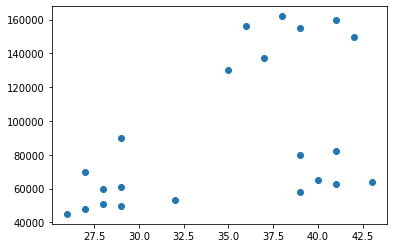

In [3]:
plt.scatter(df['Age'], df['Income($)'])

---

<h4>fit_predict() : 훈련 데이터에 맞춰 예측을 수행하므로 클러스터링과 같은 작업을 수행할 때 더 적합</h4>
<h5>- MinMaxScaler 없이 raw data 그대로 Clustering</h5>

In [4]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [7]:
df['Cluster'] = y_predicted
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


<h4>아래 코드의 결과를 보면 Cluster에 문제가 있음을 볼 수 있다.</h4>
<h5>원인 : Scaling이 되지 않음</h5>

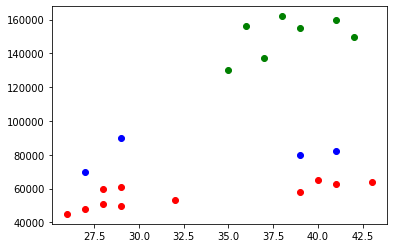

In [9]:
df_0 = df[df['Cluster'] ==0]
df_1 = df[df['Cluster'] ==1]
df_2 = df[df['Cluster'] ==2]

plt.scatter(df_0['Age'], df_0['Income($)'], c='r')
plt.scatter(df_1['Age'], df_1['Income($)'], c='g')
plt.scatter(df_2['Age'], df_2['Income($)'], c='b')

---

<h4>MinMaxScaler로 사전 처리</h4>

In [17]:
scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


<h4>K-Means</h4>

In [20]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [21]:
df['Cluster_scaler'] = y_predicted
df.head()

,Name,Age,Income($),Cluster,Cluster_scaler
0,Rob,0.058824,0.213675,2,0
1,Michael,0.176471,0.384615,2,0
2,Mohan,0.176471,0.136752,0,0
3,Ismail,0.117647,0.128205,0,0
4,Kory,0.941176,0.897436,1,1


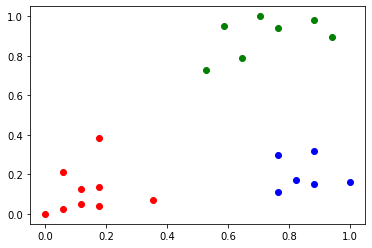

In [22]:
df_0 = df[df['Cluster_scaler'] ==0]
df_1 = df[df['Cluster_scaler'] ==1]
df_2 = df[df['Cluster_scaler'] ==2]

plt.scatter(df_0['Age'], df_0['Income($)'], c='r')
plt.scatter(df_1['Age'], df_1['Income($)'], c='g')
plt.scatter(df_2['Age'], df_2['Income($)'], c='b')

---

<h4>위의 결과를 보면 Cluster가 잘 이루어짐을 확인할 수 있음</h4>
<h5>Centroids를 같이 보여주면서 잘 되었음을 보여주는 것이 좋다!!</h5>

In [25]:
# centroids 위치
km.cluster_centers_

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

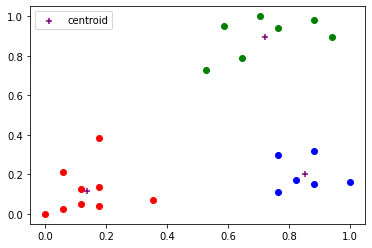

In [26]:
df_0 = df[df['Cluster_scaler'] ==0]
df_1 = df[df['Cluster_scaler'] ==1]
df_2 = df[df['Cluster_scaler'] ==2]

plt.scatter(df_0['Age'], df_0['Income($)'], c='r')
plt.scatter(df_1['Age'], df_1['Income($)'], c='g')
plt.scatter(df_2['Age'], df_2['Income($)'], c='b')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], c='purple', marker='+', label = 'centroid')
plt.legend()

---

<h4>Elbow 기법</h4>

<h5>KMeans.inertia_</h5>

<ul>
    <li>군집 내 데이터들과 중심 간의 거리의 합으로 군집의 응집도를 표현한 값</li>
    <li>값이 작을수록 군집이 잘된 것</li>
    <li>KMeans.inertia_ 로 조회 가능</li>
</ul>


In [27]:
k_rng = range(1, 10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)
sse


[5.434011511988176,
 2.0911363886990766,
 0.47507834985530933,
 0.3491047094419564,
 0.26217927623452125,
 0.22020960864009395,
 0.1784067493132793,
 0.13706529523670866,
 0.1147101299901258]

Text(0, 0.5, 'SSE')

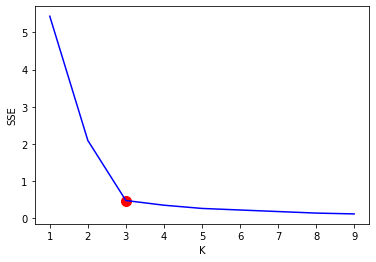

In [33]:
plt.plot(k_rng, sse, c='b')
plt.scatter(3, sse[2], c='r', s=100)
plt.xlabel('K')
plt.ylabel('SSE')